In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mygene
import h5py
import networkx as nx
import seaborn as sns
%matplotlib inline


In [60]:
SMALL_SIZE = 22 #22 para individual 
MEDIUM_SIZE = 24 #24 para figura individual #26 para pagina completa
BIGGER_SIZE = 24 #24 para figura individual #26 para pagina completa

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    # MEDIUM_SIZE para pagina completa # SMALL_SIZE individual
plt.rc('ytick', labelsize=SMALL_SIZE)    # MEDIUM_SIZE para pagina completa # SMALL_SIZE individual
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

In [76]:
rede = 'string'

df_medias = pd.read_csv(f'C:/Users/renan/Desktop/experiments/GCN/gridsearch/{rede}_mean_gridsearch.tsv', sep='\t')
df_medias


,paramset,auc_pr_mean,auc_pr_std,val_auc_pr_mean,val_auc_pr_std
0,0,0.171421,0.070135,0.167427,0.055446
1,1,0.493442,0.014228,0.486792,0.032485
2,2,0.404723,0.028659,0.399697,0.037758
3,3,0.513157,0.013478,0.503702,0.061423
4,4,0.485516,0.013777,0.477390,0.043899
...,...,...,...,...,...
283,283,0.496371,0.024702,0.479650,0.094450
284,284,0.478164,0.007265,0.470770,0.027387
285,285,0.490714,0.047899,0.485496,0.043739
286,286,0.495732,0.013407,0.491115,0.069737


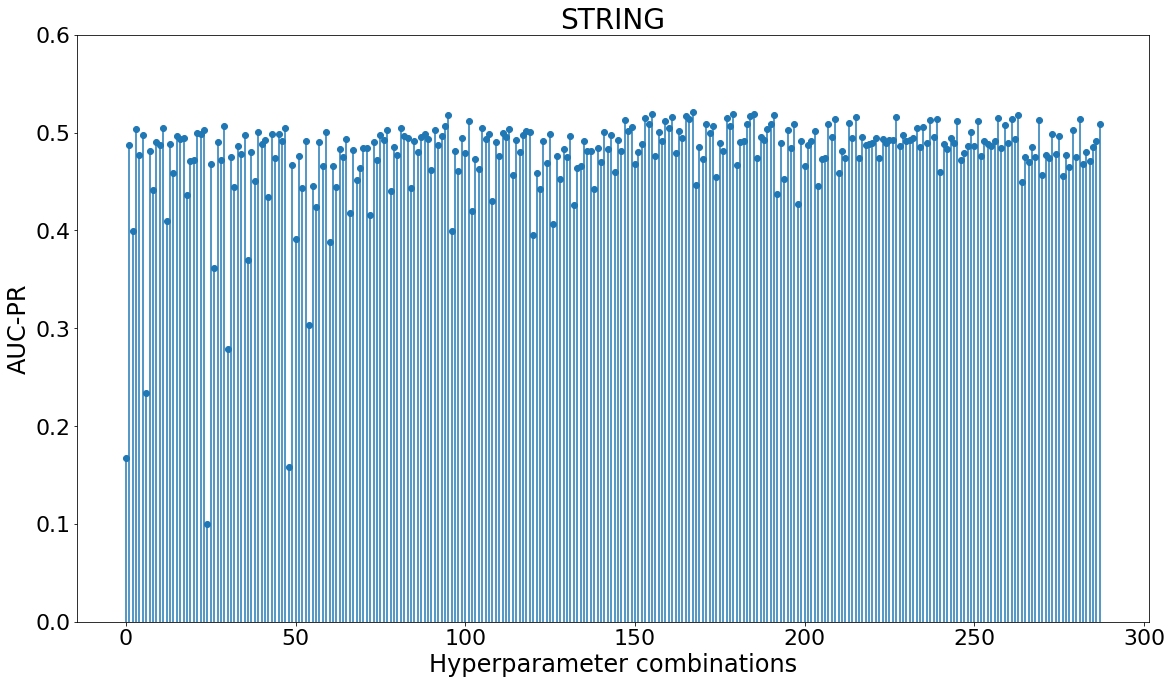

In [78]:
import matplotlib.pyplot as plt
import numpy as np
 

#plt.figure(figsize=(12.80,7.20))
plt.figure(figsize=(19.20,10.80))
plt.title(label="STRING", fontsize=28) #28 para individual #30 para pagina completa

# color = ['steelblue' if l != 191 else 'green' for l in df_medias['paramset']]

(markers, stemlines, baseline) = plt.stem(df_medias['paramset'], df_medias['val_auc_pr_mean'])
plt.setp(baseline, visible=False)

# caso queira marcar a linha da melhor métrica
# plt.setp(stemlines, color=color) 

plt.ylim(0, 0.6)
# plt.xticks([0, 50, 100, 150, 200, 250]); # tirar o 300 do final do plot 

plt.xlabel("Hyperparameter combinations")
plt.ylabel("AUC-PR")


file_name = f"C:/Users/renan/Desktop/grid_saves/val_lollipop_{rede}_title.pdf"
plt.savefig(file_name, format="pdf", bbox_inches="tight")


plt.show()

### Experimentos com um ponto de corte nos melhores resultados de auc_pr para as combinações de hiperparametros

Utilizando para encontrar uma combinações de parametros mais utilizadas nesses resultados que levaram a esses resultados 

In [10]:
df_medias_corte  = df_medias['val_auc_pr_mean'] > 0.474
medias_corte = df_medias[df_medias_corte]

medias_corte

,paramset,auc_pr_mean,auc_pr_std,val_auc_pr_mean,val_auc_pr_std
8,8,0.566736,0.018167,0.474348,0.051529
14,14,0.541839,0.012794,0.479659,0.037369
17,17,0.591184,0.010854,0.485910,0.024861
23,23,0.557422,0.006656,0.476580,0.035549
26,26,0.597574,0.007104,0.487071,0.022441
...,...,...,...,...,...
419,419,0.518573,0.004646,0.476497,0.012049
422,422,0.559457,0.017828,0.487915,0.035720
425,425,0.516698,0.010236,0.476026,0.048330
428,428,0.542240,0.004075,0.485245,0.046406


In [11]:
# Pegando o dicionário de combinações de parametros e transformando em um dataframe utilizavel

df_paramset = pd.read_csv(f'C:/Users/renan/Desktop/experiments/GCN/gridsearch/paramset.tsv', sep='\t')
df_paramset

,activations,alpha,dropout,epochs,gamma,layer_sizes,learning_rate,paramset
0,"['relu', 'relu']",0.25,0.001,500,0.0,"[64, 64]",0.00001,0
1,"['relu', 'relu']",0.25,0.001,500,0.0,"[64, 64]",0.00010,1
2,"['relu', 'relu']",0.25,0.001,500,0.0,"[64, 64]",0.00100,2
3,"['relu', 'relu']",0.25,0.001,500,0.0,"[128, 128]",0.00001,3
4,"['relu', 'relu']",0.25,0.001,500,0.0,"[128, 128]",0.00010,4
...,...,...,...,...,...,...,...,...
859,"['elu', 'elu']",0.90,0.100,500,2.0,"[128, 128]",0.00010,859
860,"['elu', 'elu']",0.90,0.100,500,2.0,"[128, 128]",0.00100,860
861,"['elu', 'elu']",0.90,0.100,500,2.0,"[256, 256]",0.00001,861
862,"['elu', 'elu']",0.90,0.100,500,2.0,"[256, 256]",0.00010,862


In [12]:
# comparando os dois dataframes e removendo do datraframe de parametros os que sairam na média de corte

teste = pd.merge(df_paramset, df_medias, how = 'inner', on = 'paramset')
teste

,activations,alpha,dropout,epochs,gamma,layer_sizes,learning_rate,paramset,auc_pr_mean,auc_pr_std,val_auc_pr_mean,val_auc_pr_std
0,"['relu', 'relu']",0.25,0.001,500,0.0,"[64, 64]",0.00001,0,0.053308,0.000551,0.053025,0.002452
1,"['relu', 'relu']",0.25,0.001,500,0.0,"[64, 64]",0.00010,1,0.051888,0.000395,0.053381,0.003689
2,"['relu', 'relu']",0.25,0.001,500,0.0,"[64, 64]",0.00100,2,0.381709,0.111026,0.334095,0.084015
3,"['relu', 'relu']",0.25,0.001,500,0.0,"[128, 128]",0.00001,3,0.052231,0.000312,0.052701,0.000930
4,"['relu', 'relu']",0.25,0.001,500,0.0,"[128, 128]",0.00010,4,0.052068,0.000873,0.052678,0.003213
...,...,...,...,...,...,...,...,...,...,...,...,...
859,"['elu', 'elu']",0.90,0.100,500,2.0,"[128, 128]",0.00010,859,0.391465,0.013854,0.385118,0.026421
860,"['elu', 'elu']",0.90,0.100,500,2.0,"[128, 128]",0.00100,860,0.418342,0.011252,0.407849,0.038335
861,"['elu', 'elu']",0.90,0.100,500,2.0,"[256, 256]",0.00001,861,0.313759,0.014176,0.317529,0.021750
862,"['elu', 'elu']",0.90,0.100,500,2.0,"[256, 256]",0.00010,862,0.397048,0.008479,0.395618,0.034725


In [25]:
# refazendo o corte para o dataframe completo

teste_medias_corte  = teste['val_auc_pr_mean'] > 0.2
teste_corte = teste[teste_medias_corte]

teste_corte

,activations,alpha,dropout,epochs,gamma,layer_sizes,learning_rate,paramset,auc_pr_mean,auc_pr_std,val_auc_pr_mean,val_auc_pr_std
2,"['relu', 'relu']",0.25,0.001,500,0.0,"[64, 64]",0.00100,2,0.381709,0.111026,0.334095,0.084015
5,"['relu', 'relu']",0.25,0.001,500,0.0,"[128, 128]",0.00100,5,0.533243,0.011840,0.470051,0.053172
8,"['relu', 'relu']",0.25,0.001,500,0.0,"[256, 256]",0.00100,8,0.566736,0.018167,0.474348,0.051529
11,"['relu', 'relu']",0.25,0.001,500,0.5,"[64, 64]",0.00100,11,0.473007,0.049900,0.430674,0.032798
14,"['relu', 'relu']",0.25,0.001,500,0.5,"[128, 128]",0.00100,14,0.541839,0.012794,0.479659,0.037369
...,...,...,...,...,...,...,...,...,...,...,...,...
859,"['elu', 'elu']",0.90,0.100,500,2.0,"[128, 128]",0.00010,859,0.391465,0.013854,0.385118,0.026421
860,"['elu', 'elu']",0.90,0.100,500,2.0,"[128, 128]",0.00100,860,0.418342,0.011252,0.407849,0.038335
861,"['elu', 'elu']",0.90,0.100,500,2.0,"[256, 256]",0.00001,861,0.313759,0.014176,0.317529,0.021750
862,"['elu', 'elu']",0.90,0.100,500,2.0,"[256, 256]",0.00010,862,0.397048,0.008479,0.395618,0.034725


In [26]:
# conta a ocorrencia de parametros 

print(teste_corte['activations'].value_counts(normalize=True))

print(teste_corte['alpha'].value_counts(normalize=True))

print(teste_corte['dropout'].value_counts(normalize=True))

print(teste_corte['gamma'].value_counts(normalize=True))

print(teste_corte['layer_sizes'].value_counts(normalize=True))

print(teste_corte['learning_rate'].value_counts(normalize=True))

['elu', 'elu']      0.509054
['relu', 'relu']    0.490946
Name: activations, dtype: float64
0.90    0.434608
0.75    0.259557
0.50    0.162978
0.25    0.142857
Name: alpha, dtype: float64
0.100    0.334004
0.001    0.334004
0.010    0.331992
Name: dropout, dtype: float64
2.0    0.265594
1.0    0.255533
0.5    0.243461
0.0    0.235412
Name: gamma, dtype: float64
[256, 256]    0.356137
[128, 128]    0.334004
[64, 64]      0.309859
Name: layer_sizes, dtype: float64
0.00100    0.577465
0.00010    0.277666
0.00001    0.144869
Name: learning_rate, dtype: float64


--------

### Script para gráficos de predições

In [38]:
predict = pd.read_csv(f'C:/Users/renan/Desktop/predict/test_predictions_string.csv')
predict

,gene,Predicted,Probability,True
0,MYL12B,0.0,0.387705,0.0
1,AKAP1,0.0,0.419828,0.0
2,EID1,0.0,0.305836,0.0
3,UCN3,0.0,0.219629,0.0
4,RBM11,0.0,0.231891,0.0
...,...,...,...,...
1129,FKBP2,0.0,0.367772,0.0
1130,TLK2,0.0,0.315822,0.0
1131,NDUFS1,0.0,0.141929,0.0
1132,ARL4D,0.0,0.343029,0.0


In [39]:
SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

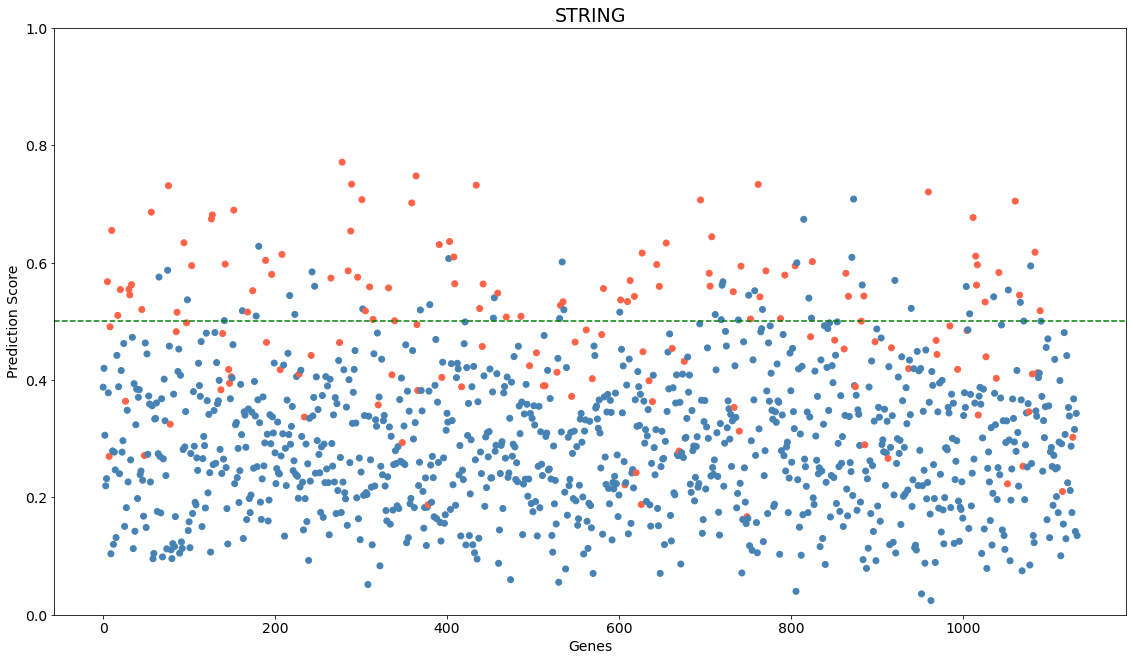

In [40]:
plt.figure(figsize=(19.20,10.80))
plt.title(label="STRING", fontsize=19)
plt.ylim([0, 1])
plt.axhline(y=0.5, color='green', linestyle='--')

color= ['steelblue' if l == 0 else 'tomato' if l == 1 else 'silver' for l in predict['True']]
plt.scatter(predict.index, predict['Probability'], c=color)

plt.xlabel("Genes")
plt.ylabel("Prediction Score")

file_name = f"test_predictions_string.pdf"
plt.savefig(file_name)

plt.show()